In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# --- Setup ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Load the dataset
file_name = 'netflix_titles.csv'
df = pd.read_csv(file_name)

print("Dataset loaded successfully.")
df.info()

Dataset loaded successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB



--- Content Type Analysis (Q1) ---
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Ratio: 69.6% Movies, 30.4% TV Shows

Generated 'q1_movie_tv_show_ratio.png'


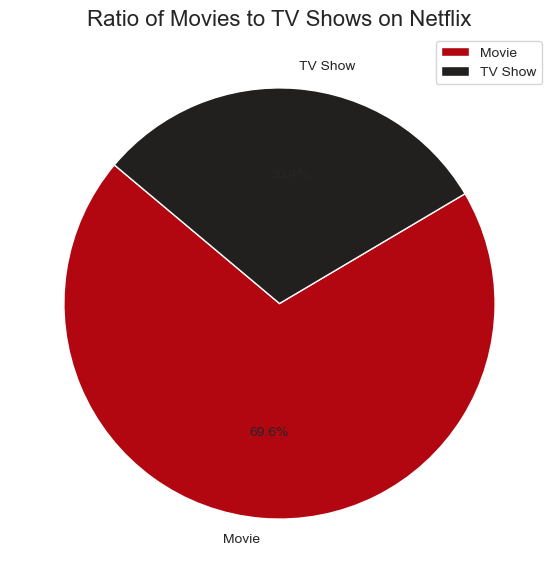

In [3]:
# --- Q1: Ratio of Movies to TV Shows ---
print("\n--- Content Type Analysis (Q1) ---")
type_counts = df['type'].value_counts()

# Print the text output
print(type_counts)
print(f"\nRatio: {type_counts['Movie'] / len(df) * 100:.1f}% Movies, {type_counts['TV Show'] / len(df) * 100:.1f}% TV Shows")

# Plot pie chart for Q1
plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#b20710', '#221f1f'])
plt.title('Ratio of Movies to TV Shows on Netflix', fontsize=16)
plt.legend()
plt.savefig('q1_movie_tv_show_ratio.png')
print("\nGenerated 'q1_movie_tv_show_ratio.png'")


--- Genre Analysis (Q2) ---
Top 15 Most Popular Genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: count, dtype: int64

Generated 'q2_top_15_genres.png'


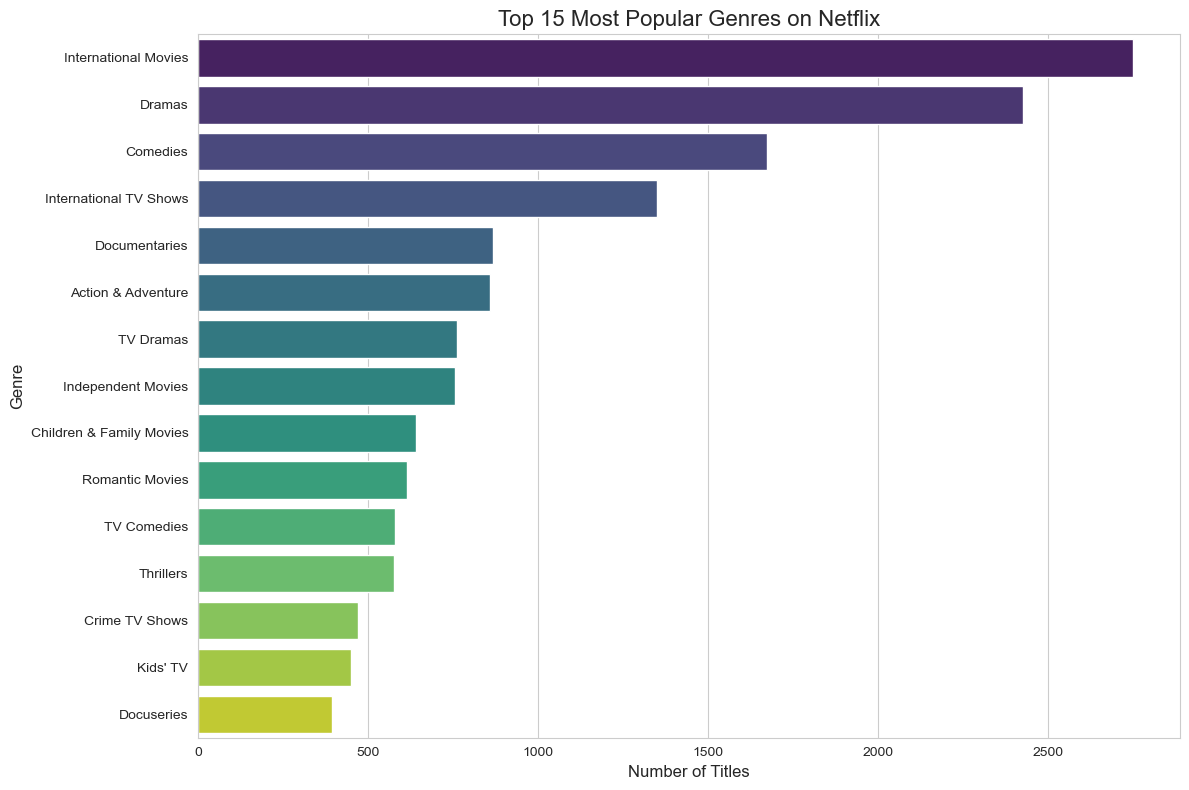

In [4]:
# --- Q2: Most Popular Genres ---
print("\n--- Genre Analysis (Q2) ---")

# Split and explode the 'listed_in' column
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

print("Top 15 Most Popular Genres:")
print(genre_counts.head(15))

# Plot horizontal bar chart for Q2
top_genres = 15
plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.head(top_genres).index, x=genre_counts.head(top_genres).values, palette='viridis')
plt.title(f'Top {top_genres} Most Popular Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('q2_top_15_genres.png')
print("\nGenerated 'q2_top_15_genres.png'")


--- Content Release Year Analysis (Q3) ---
Top 15 Release Years for Content:
release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: count, dtype: int64

Generated 'q3_top_15_release_years.png'


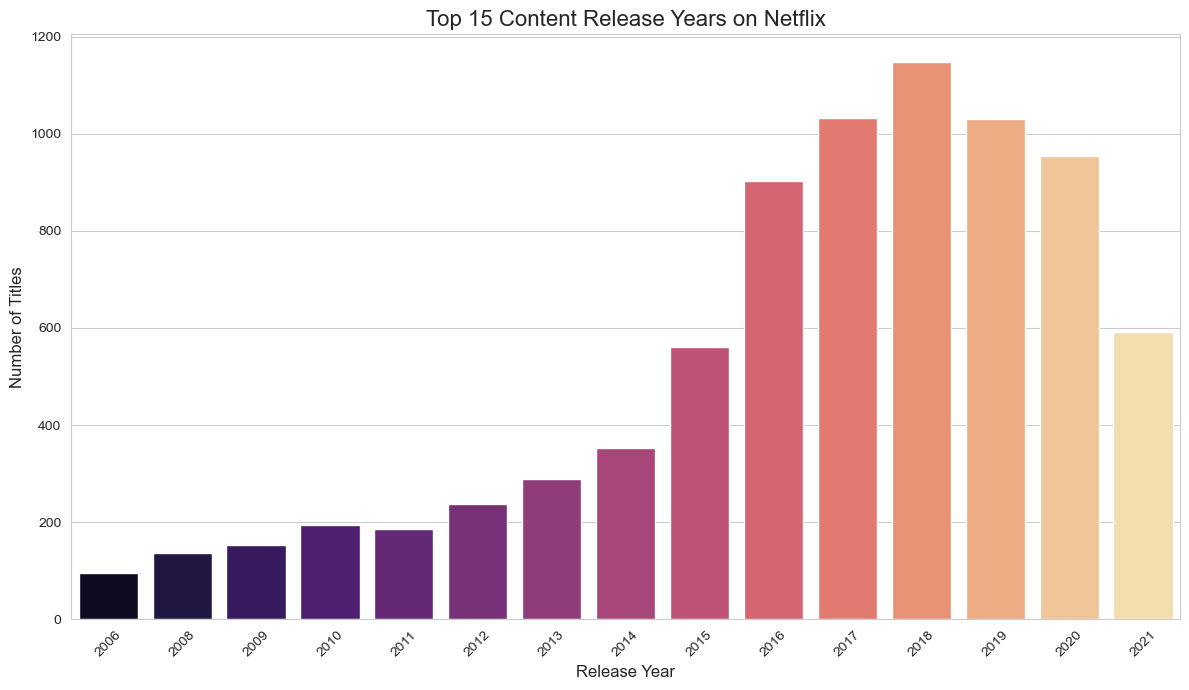

In [5]:
# --- Q3: Highest Release Years ---
print("\n--- Content Release Year Analysis (Q3) ---")
release_year_counts = df['release_year'].value_counts()

print("Top 15 Release Years for Content:")
print(release_year_counts.head(15))

# Plot bar chart for Q3
top_years = 15
plt.figure(figsize=(12, 7))
sns.barplot(x=release_year_counts.head(top_years).index.astype(int), y=release_year_counts.head(top_years).values, palette='magma')
plt.title(f'Top {top_years} Content Release Years on Netflix', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q3_top_15_release_years.png')
print("\nGenerated 'q3_top_15_release_years.png'")


--- Country Analysis (Q4) ---
Top 10 Content Producing Countries:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64

Generated 'q4_top_10_countries.png'


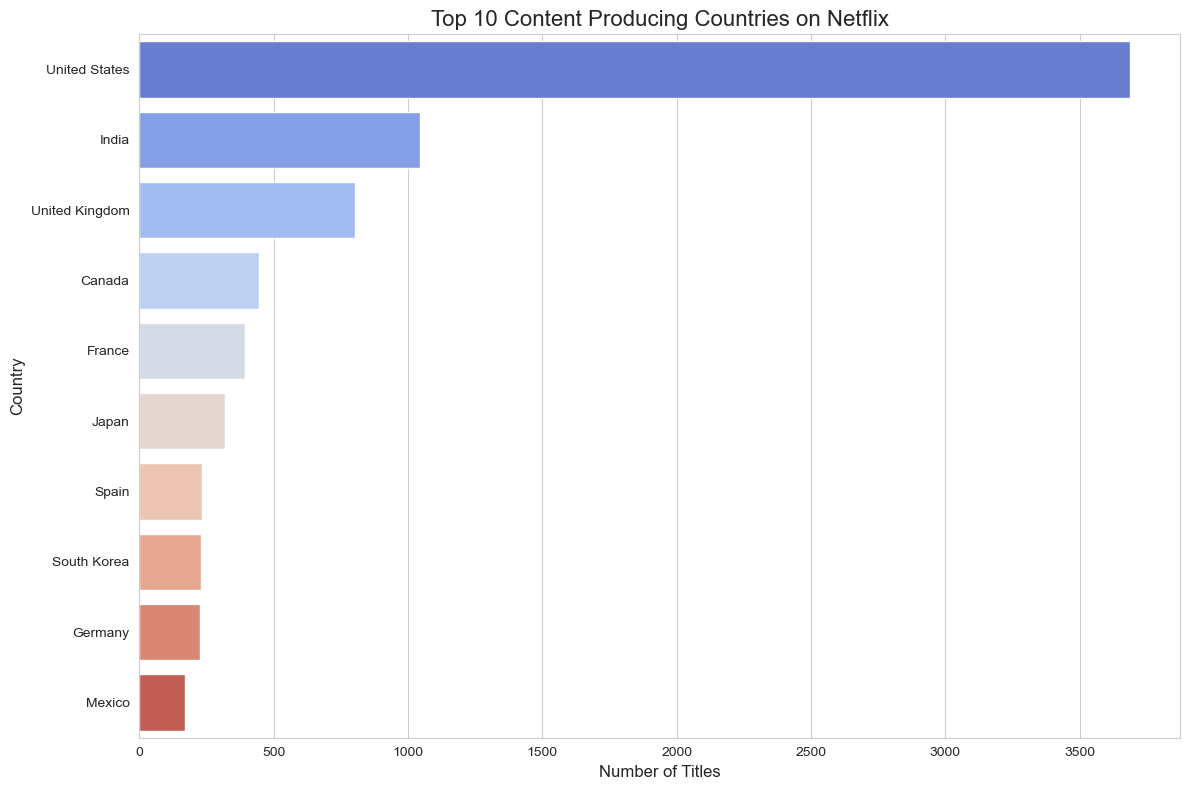

In [6]:
# --- Q4: Top Content Producing Countries ---
print("\n--- Country Analysis (Q4) ---")

# Clean and process the 'country' column
country_cleaned = df.dropna(subset=['country'])
country_counts = country_cleaned['country'].str.split(', ').explode().str.strip().value_counts()

if '' in country_counts:
    country_counts = country_counts.drop('')

print("Top 10 Content Producing Countries:")
print(country_counts.head(10))

# Plot horizontal bar chart for Q4
top_countries = 10
plt.figure(figsize=(12, 8))
sns.barplot(y=country_counts.head(top_countries).index, x=country_counts.head(top_countries).values, palette='coolwarm')
plt.title(f'Top {top_countries} Content Producing Countries on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('q4_top_10_countries.png')
print("\nGenerated 'q4_top_10_countries.png'")


--- Content Addition Trend Analysis (Q5) ---
Number of Titles Added to Netflix by Year:
year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64

Generated 'q5_content_added_trend.png'


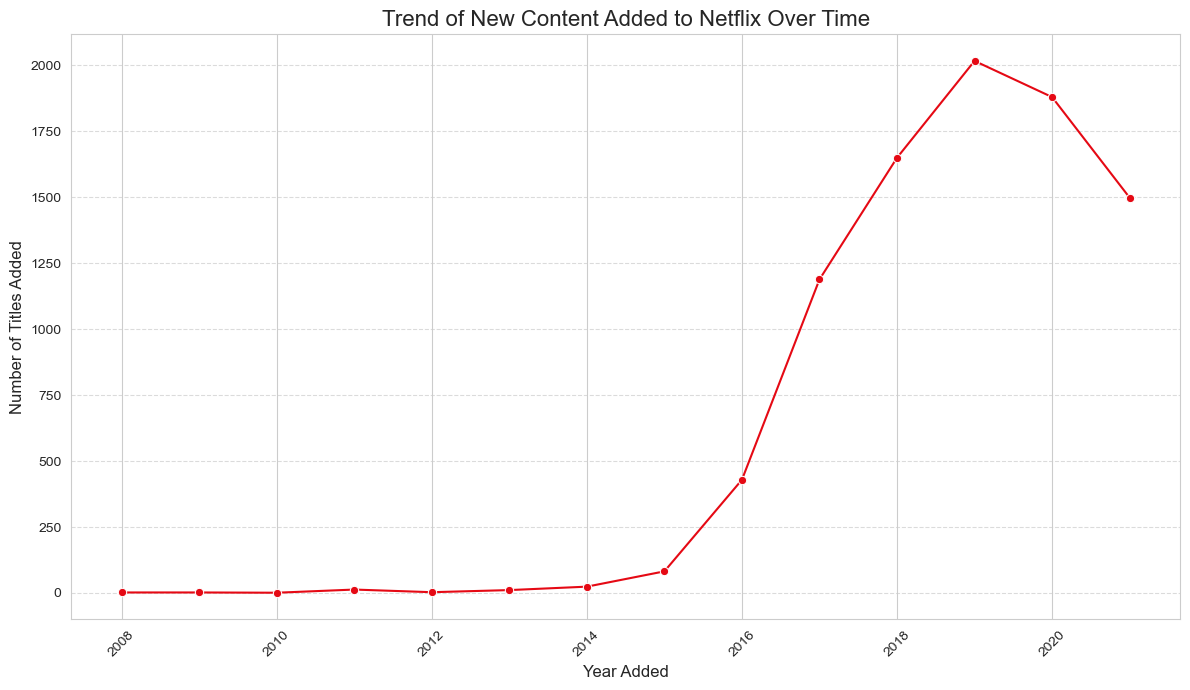

In [7]:
# --- Q5: Trend of Adding New Content ---
print("\n--- Content Addition Trend Analysis (Q5) ---")

df_date_cleaned = df.dropna(subset=['date_added']).copy()
df_date_cleaned['date_added'] = pd.to_datetime(df_date_cleaned['date_added'].str.strip(), format='%B %d, %Y')
df_date_cleaned['year_added'] = df_date_cleaned['date_added'].dt.year
content_added_trend = df_date_cleaned['year_added'].value_counts().sort_index()

print("Number of Titles Added to Netflix by Year:")
print(content_added_trend)

# 5. Plot line chart for Q5
plt.figure(figsize=(12, 7))
sns.lineplot(x=content_added_trend.index, y=content_added_trend.values, marker='o', color='#E50914')
plt.title('Trend of New Content Added to Netflix Over Time', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('q5_content_added_trend.png')
print("\nGenerated 'q5_content_added_trend.png'")


--- Q6: Most Frequent Ratings ---
Frequency of Content Ratings:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Generated 'q6_rating_frequency.png'


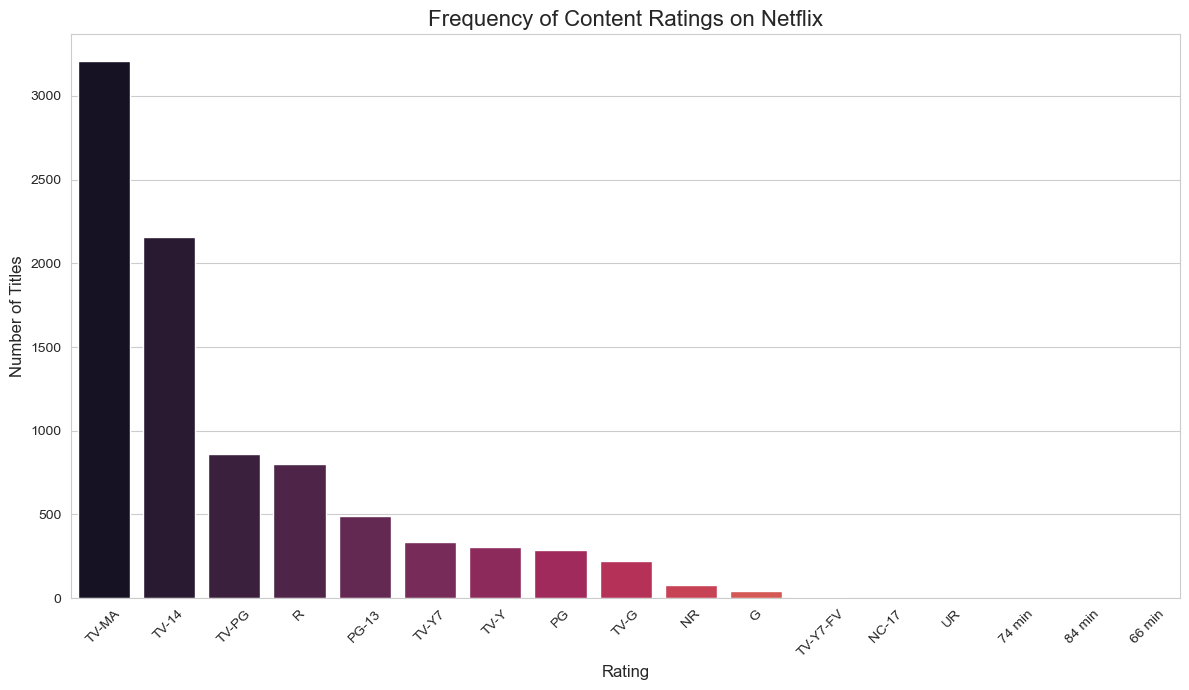

In [8]:
# --- Q6: Most Frequent Ratings ---
print("\n--- Q6: Most Frequent Ratings ---")
# Drop rows where 'rating' is missing
rating_counts = df.dropna(subset=['rating'])['rating'].value_counts()

print("Frequency of Content Ratings:")
print(rating_counts)

plt.figure(figsize=(12, 7))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rocket')
plt.title('Frequency of Content Ratings on Netflix', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q6_rating_frequency.png')
print("\nGenerated 'q6_rating_frequency.png'")


--- Q7: Top Countries Producing Mature Content (TV-MA) ---
Top 10 Countries Producing TV-MA Content:
country
United States     1100
India              266
United Kingdom     251
Spain              170
France             163
Canada             107
Mexico             102
Japan              101
South Korea         92
Germany             79
Name: count, dtype: int64

Generated 'q7_mature_content_countries.png'


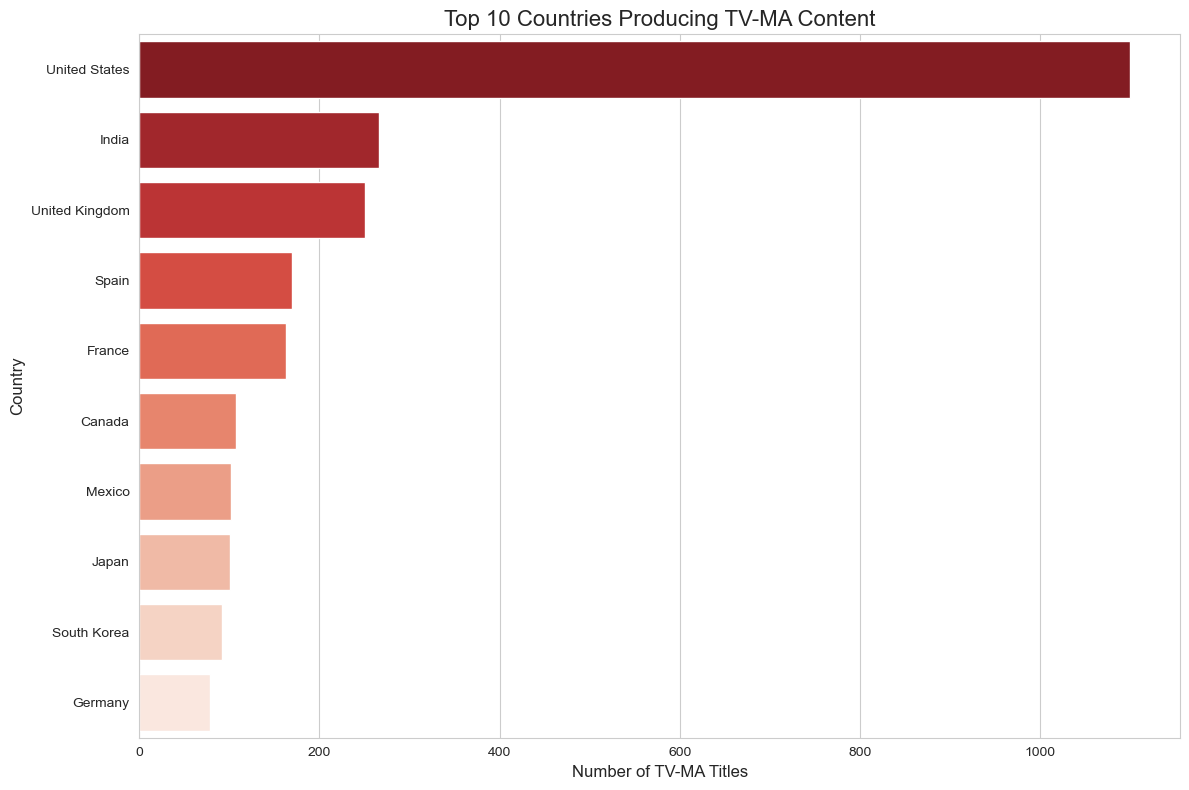

In [9]:
# --- Q7: Top Countries Producing Mature Content (TV-MA) ---
print("\n--- Q7: Top Countries Producing Mature Content (TV-MA) ---")
df_mature = df[(df['rating'] == 'TV-MA') & (df['country'].notna())].copy()
mature_country_counts = df_mature['country'].str.split(', ').explode().str.strip().value_counts()

if '' in mature_country_counts:
    mature_country_counts = mature_country_counts.drop('')

top_mature_countries = 10
print(f"Top {top_mature_countries} Countries Producing TV-MA Content:")
print(mature_country_counts.head(top_mature_countries))

plt.figure(figsize=(12, 8))
sns.barplot(y=mature_country_counts.head(top_mature_countries).index, 
            x=mature_country_counts.head(top_mature_countries).values, 
            palette='Reds_r')
plt.title(f'Top {top_mature_countries} Countries Producing TV-MA Content', fontsize=16)
plt.xlabel('Number of TV-MA Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.savefig('q7_mature_content_countries.png')
print("\nGenerated 'q7_mature_content_countries.png'")


--- Q8: Which genres are more associated with TV Shows vs Movies? ---

Top 10 Movie Genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64

Generated 'q8_top_movie_genres.png'

Top 10 TV Show Genres:
listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: count, dtype: int64

Generated 'q8_top_tv_show_genres.png'


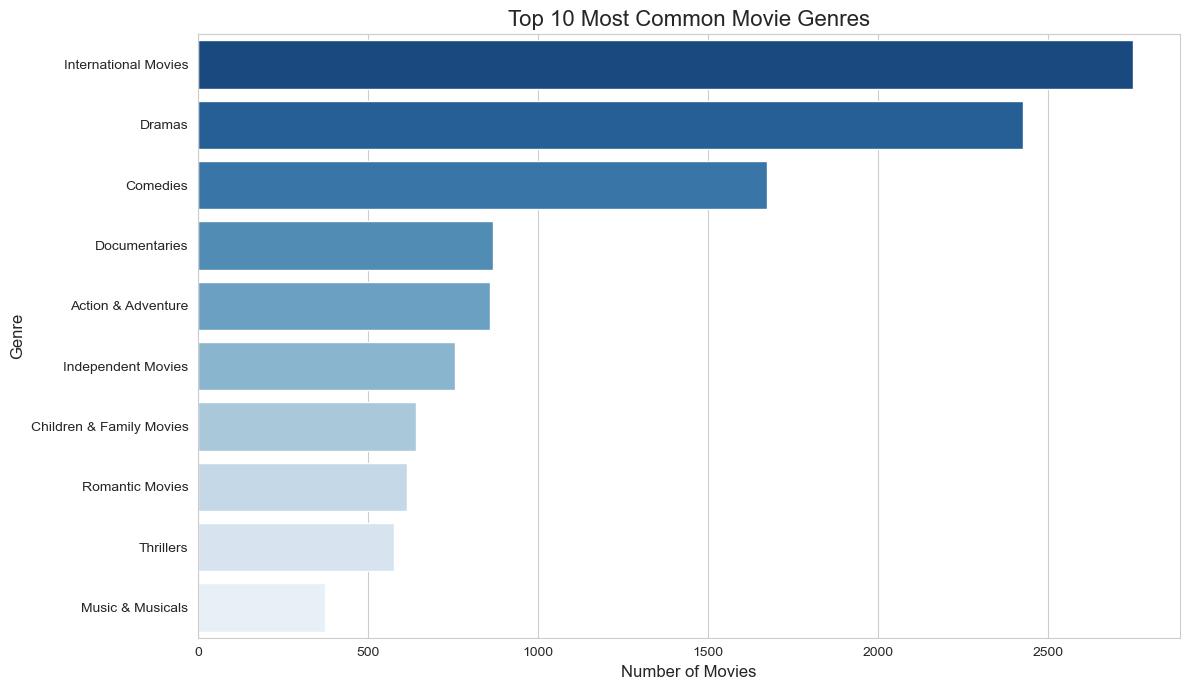

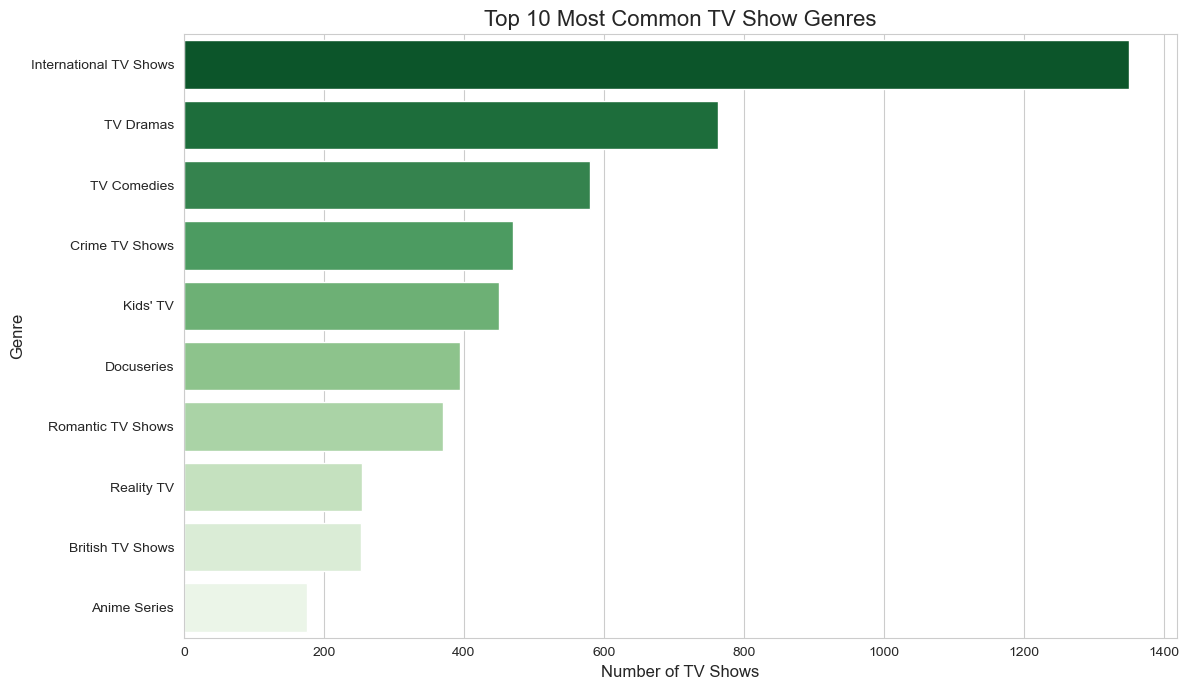

In [10]:
# --- Q8: Which genres are more associated with TV Shows vs Movies? ---
print("\n--- Q8: Which genres are more associated with TV Shows vs Movies? ---")

df_movies = df[df['type'] == 'Movie']
df_tv = df[df['type'] == 'TV Show']

# Get top genres for Movies
movie_genres = df_movies['listed_in'].str.split(', ').explode().value_counts()
top_movie_genres = movie_genres.head(10)
print("\nTop 10 Movie Genres:")
print(top_movie_genres)

# Plot for Movie Genres
plt.figure(figsize=(12, 7))
sns.barplot(y=top_movie_genres.index, x=top_movie_genres.values, palette='Blues_r')
plt.title('Top 10 Most Common Movie Genres', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('q8_top_movie_genres.png')
print("\nGenerated 'q8_top_movie_genres.png'")

# Get top genres for TV Shows
tv_genres = df_tv['listed_in'].str.split(', ').explode().value_counts()
top_tv_genres = tv_genres.head(10)
print("\nTop 10 TV Show Genres:")
print(top_tv_genres)

# Plot for TV Show Genres
plt.figure(figsize=(12, 7))
sns.barplot(y=top_tv_genres.index, x=top_tv_genres.values, palette='Greens_r')
plt.title('Top 10 Most Common TV Show Genres', fontsize=16)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('q8_top_tv_show_genres.png')
print("\nGenerated 'q8_top_tv_show_genres.png'")


--- Q9: Top Genres in U.S. vs. Other Countries ---

Top 10 Genres in the United States:
listed_in
Dramas                      674
Comedies                    610
Documentaries               452
Children & Family Movies    337
Independent Movies          331
Action & Adventure          323
TV Comedies                 244
Thrillers                   233
Stand-Up Comedy             216
TV Dramas                   205
Name: count, dtype: int64

Generated 'q9_top_us_genres.png'

Top 10 Genres Outside the United States (by primary country):
listed_in
International Movies      2497
Dramas                    1643
International TV Shows    1085
Comedies                   970
Action & Adventure         494
TV Dramas                  458
Independent Movies         414
Romantic Movies            393
Documentaries              342
Thrillers                  316
Name: count, dtype: int64

Generated 'q9_top_non_us_genres.png'


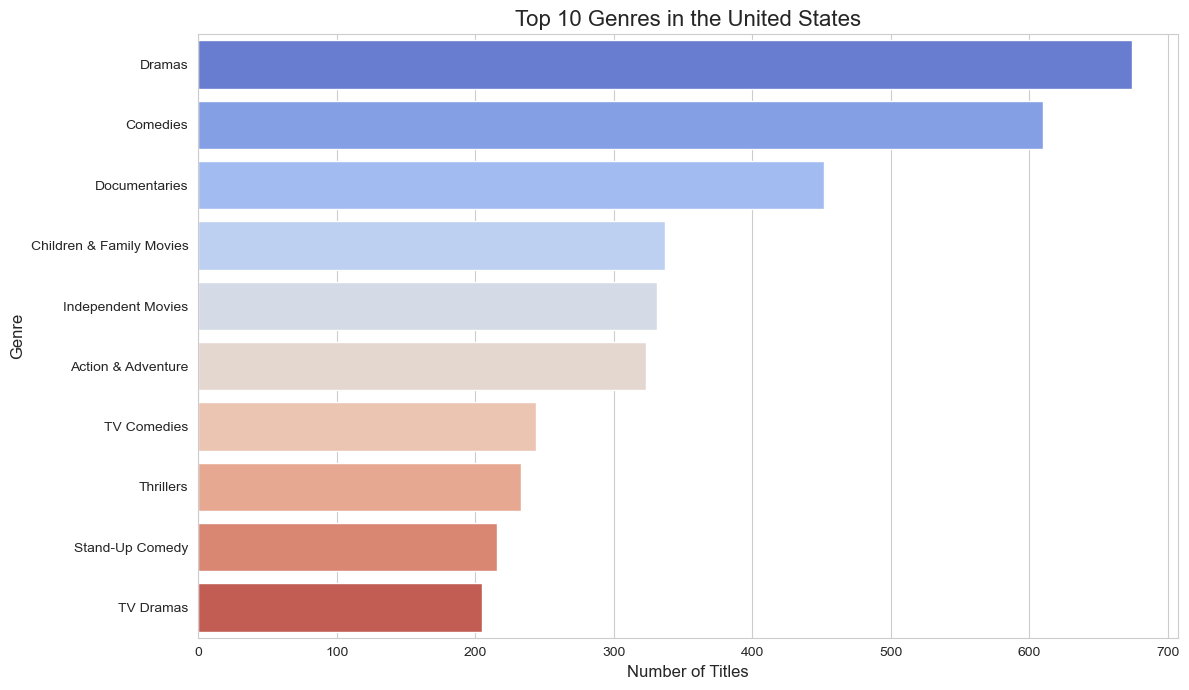

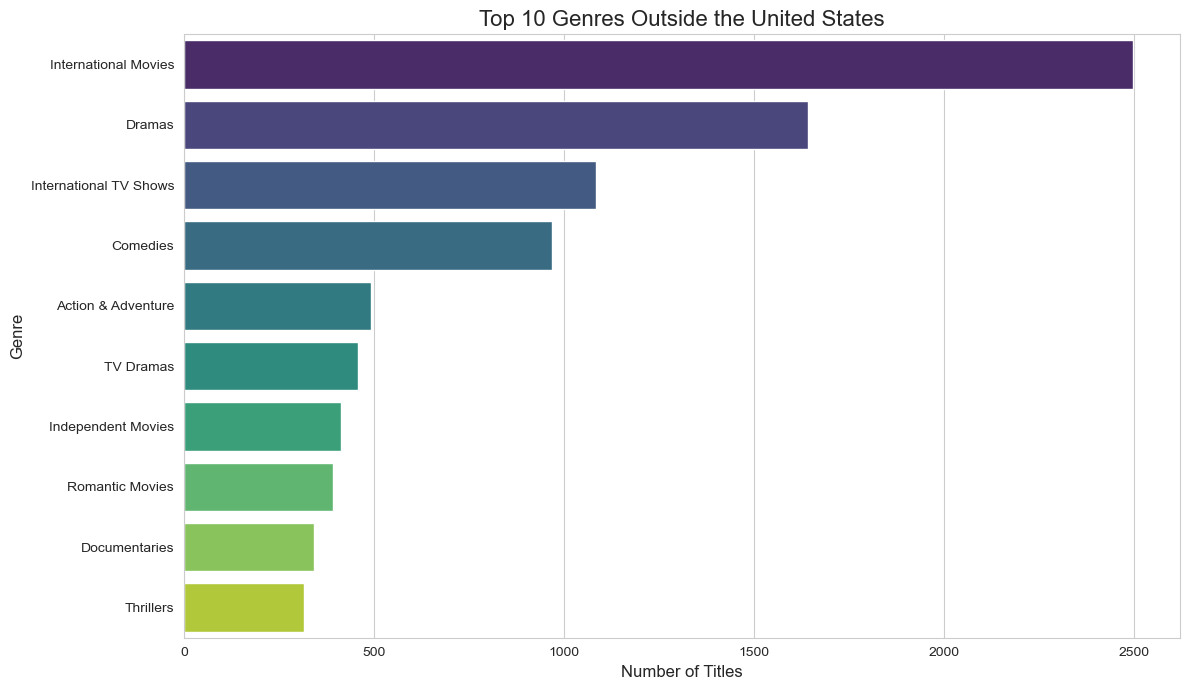

In [11]:
# --- Q9: Which genres dominate the U.S. vs other countries? ---
print("\n--- Q9: Top Genres in U.S. vs. Other Countries ---")

df_country_genres = df.dropna(subset=['country', 'listed_in']).copy()
# Take the primary country
df_country_genres['country_single'] = df_country_genres['country'].str.split(', ').str[0]

# Separate US vs Non-US
df_us = df_country_genres[df_country_genres['country_single'] == 'United States']
df_non_us = df_country_genres[df_country_genres['country_single'] != 'United States']

# Get top US genres
us_genres = df_us['listed_in'].str.split(', ').explode().value_counts()
top_us_genres = us_genres.head(10)
print("\nTop 10 Genres in the United States:")
print(top_us_genres)

# Plot for US Genres
plt.figure(figsize=(12, 7))
sns.barplot(y=top_us_genres.index, x=top_us_genres.values, palette='coolwarm')
plt.title('Top 10 Genres in the United States', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('q9_top_us_genres.png')
print("\nGenerated 'q9_top_us_genres.png'")

# Get top Non-US genres
non_us_genres = df_non_us['listed_in'].str.split(', ').explode().value_counts()
top_non_us_genres = non_us_genres.head(10)
print("\nTop 10 Genres Outside the United States (by primary country):")
print(top_non_us_genres)

# Plot for Non-US Genres
plt.figure(figsize=(12, 7))
sns.barplot(y=top_non_us_genres.index, x=top_non_us_genres.values, palette='viridis')
plt.title('Top 10 Genres Outside the United States', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('q9_top_non_us_genres.png')
print("\nGenerated 'q9_top_non_us_genres.png'")


--- Q10: Most Popular Genres in the Last 3 Years (2019-2021) ---
Analyzing recent years: [2019, 2020, 2021]

Top 15 Genres from 2019-2021:
listed_in
International Movies        662
International TV Shows      564
Dramas                      530
Comedies                    362
TV Dramas                   343
TV Comedies                 252
Documentaries               234
Crime TV Shows              226
Children & Family Movies    205
Docuseries                  178
Kids' TV                    166
Romantic Movies             150
Thrillers                   149
Reality TV                  141
Independent Movies          138
Name: count, dtype: int64

Generated 'q10_recent_genres.png'


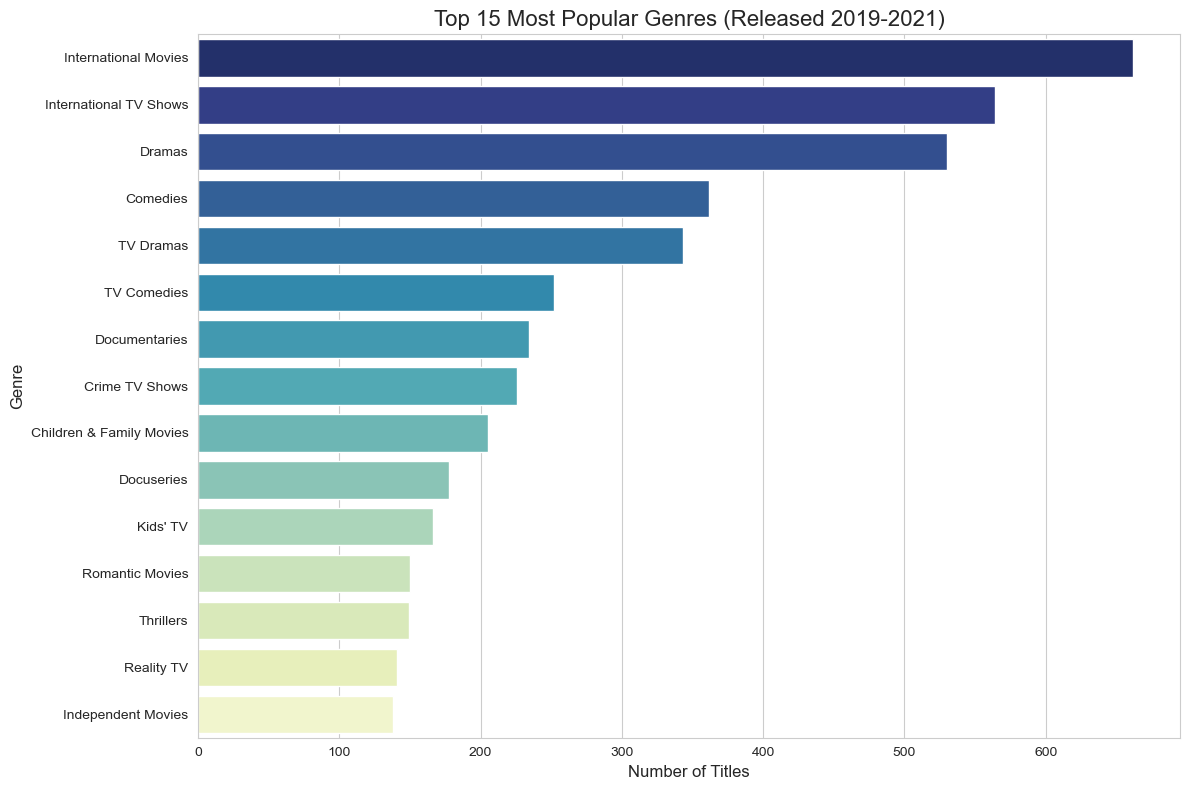

In [13]:
# --- Q10: What genres are most popular in the last 3 years? ---
print("\n--- Q10: Most Popular Genres in the Last 3 Years (2019-2021) ---")

latest_year = df['release_year'].max()
recent_years = [latest_year - 2, latest_year - 1, latest_year]
print(f"Analyzing recent years: {recent_years}")

df_recent = df[(df['release_year'].isin(recent_years)) & (df['listed_in'].notna())].copy()
recent_genre_counts = df_recent['listed_in'].str.split(', ').explode().value_counts()

top_recent_genres = 15
print(f"\nTop {top_recent_genres} Genres from {recent_years[0]}-{recent_years[-1]}:")
print(recent_genre_counts.head(top_recent_genres))

# Plot for Recent Genres
plt.figure(figsize=(12, 8))
sns.barplot(y=recent_genre_counts.head(top_recent_genres).index, 
            x=recent_genre_counts.head(top_recent_genres).values, 
            palette='YlGnBu_r')
plt.title(f'Top {top_recent_genres} Most Popular Genres (Released {recent_years[0]}-{recent_years[-1]})', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('q10_recent_genres.png')
print("\nGenerated 'q10_recent_genres.png'")


--- Q11: Top 10 Directors by Number of Titles ---
Top 10 Directors on Netflix:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: count, dtype: int64

Generated 'q11_top_directors.png'


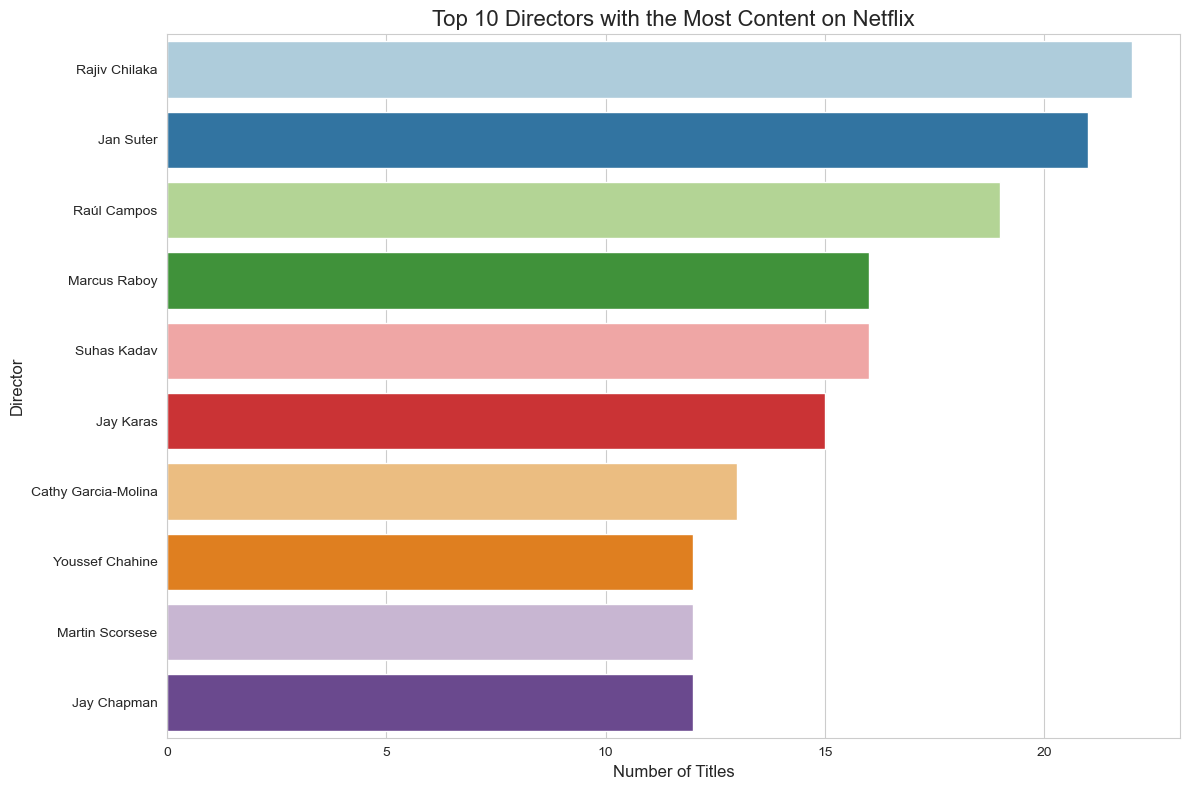

In [14]:
# --- Q11: Top 10 Directors by Number of Titles ---
print("\n--- Q11: Top 10 Directors by Number of Titles ---")
directors_cleaned = df.dropna(subset=['director'])
director_counts = directors_cleaned['director'].str.split(', ').explode().str.strip().value_counts()

if '' in director_counts:
    director_counts = director_counts.drop('')

top_directors = 10
print(f"Top {top_directors} Directors on Netflix:")
print(director_counts.head(top_directors))

plt.figure(figsize=(12, 8))
sns.barplot(y=director_counts.head(top_directors).index, 
            x=director_counts.head(top_directors).values, 
            palette='Paired')
plt.title(f'Top {top_directors} Directors with the Most Content on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.tight_layout()
plt.savefig('q11_top_directors.png')
print("\nGenerated 'q11_top_directors.png'")


--- Q12: Top 10 Most Frequent Actors ---
Top 10 Most Frequent Actors on Netflix:
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64

Generated 'q12_top_actors.png'


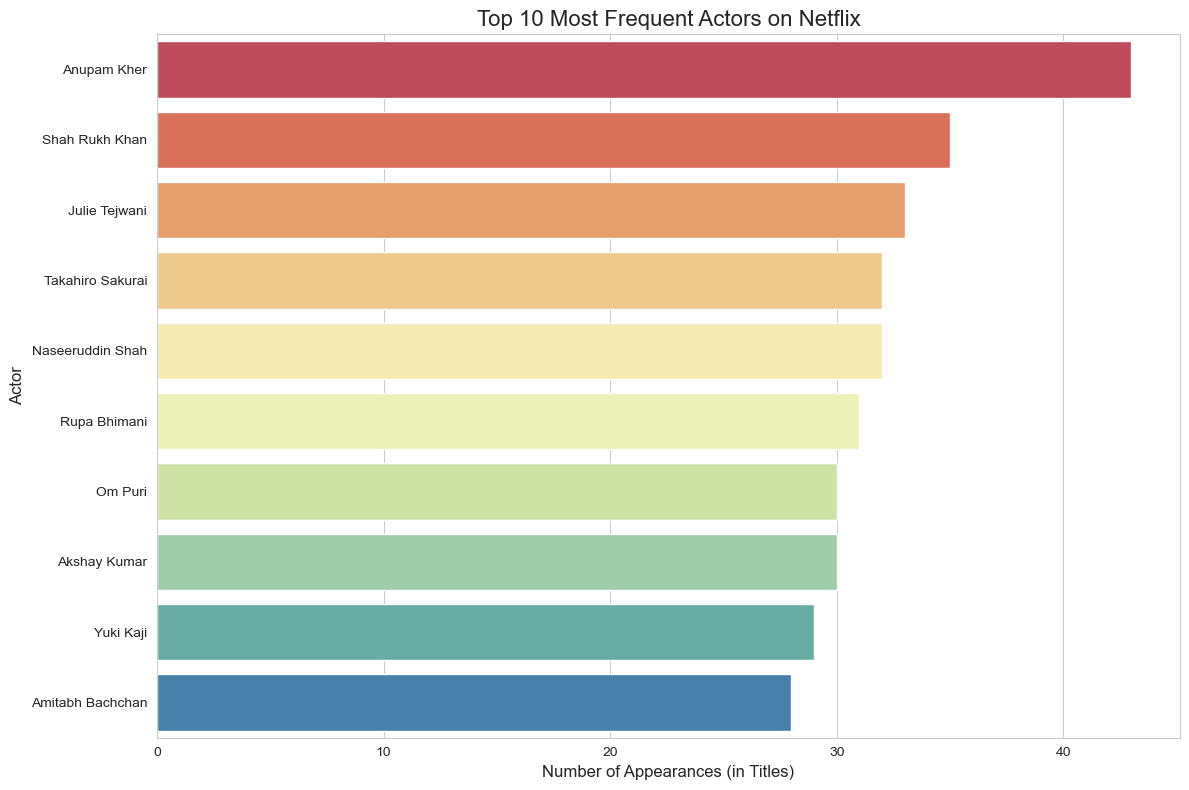

In [15]:
# --- Q12: Top 10 Most Frequent Actors ---
print("\n--- Q12: Top 10 Most Frequent Actors ---")
cast_cleaned = df.dropna(subset=['cast'])
cast_counts = cast_cleaned['cast'].str.split(', ').explode().str.strip().value_counts()

if '' in cast_counts:
    cast_counts = cast_counts.drop('')

top_actors = 10
print(f"Top {top_actors} Most Frequent Actors on Netflix:")
print(cast_counts.head(top_actors))

plt.figure(figsize=(12, 8))
sns.barplot(y=cast_counts.head(top_actors).index, 
            x=cast_counts.head(top_actors).values, 
            palette='Spectral')
plt.title(f'Top {top_actors} Most Frequent Actors on Netflix', fontsize=16)
plt.xlabel('Number of Appearances (in Titles)', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.tight_layout()
plt.savefig('q12_top_actors.png')
print("\nGenerated 'q12_top_actors.png'")


--- Q13: Most Frequent Director-Genre Pairs ---
Top 15 Director-Genre Pairs:
director_single      genre_single            
Rajiv Chilaka        Children & Family Movies    22
Jan Suter            Stand-Up Comedy             21
Raúl Campos          Stand-Up Comedy             19
Suhas Kadav          Children & Family Movies    16
Marcus Raboy         Stand-Up Comedy             15
Jay Karas            Stand-Up Comedy             14
Cathy Garcia-Molina  International Movies        13
Jay Chapman          Stand-Up Comedy             12
Youssef Chahine      Dramas                      12
                     International Movies        10
David Dhawan         Comedies                     9
Cathy Garcia-Molina  Dramas                       9
Don Michael Paul     Action & Adventure           9
Martin Scorsese      Dramas                       9
Yılmaz Erdoğan       International Movies         9
dtype: int64

Generated 'q13_director_genre_pairs.png'


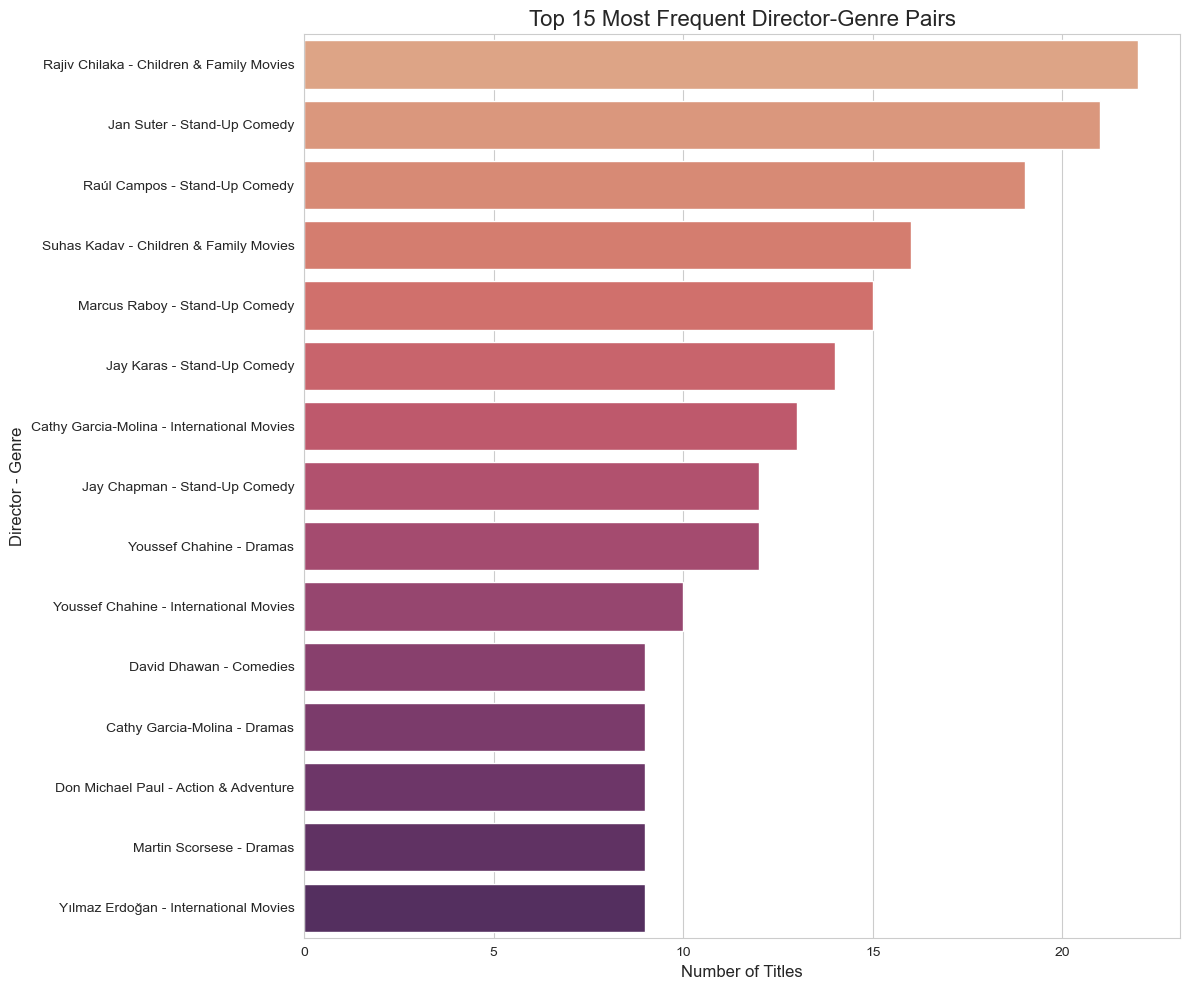

In [16]:
# --- Q13: Most Frequent Director-Genre Pairs ---
print("\n--- Q13: Most Frequent Director-Genre Pairs ---")
df_pairs = df.dropna(subset=['director', 'listed_in']).copy()

df_pairs['director_single'] = df_pairs['director'].str.split(', ')
df_pairs = df_pairs.explode('director_single')
df_pairs['genre_single'] = df_pairs['listed_in'].str.split(', ')
df_pairs = df_pairs.explode('genre_single')

df_pairs['director_single'] = df_pairs['director_single'].str.strip()
df_pairs['genre_single'] = df_pairs['genre_single'].str.strip()

director_genre_counts = df_pairs.groupby(['director_single', 'genre_single']).size().sort_values(ascending=False)

top_pairs = 15
print(f"Top {top_pairs} Director-Genre Pairs:")
print(director_genre_counts.head(top_pairs))

# For plotting, reformat the index
top_pairs_df = director_genre_counts.head(top_pairs).reset_index()
top_pairs_df['pair'] = top_pairs_df['director_single'] + ' - ' + top_pairs_df['genre_single']
top_pairs_df.columns = ['Director', 'Genre', 'Count', 'Pair']

plt.figure(figsize=(12, 10))
sns.barplot(y='Pair', x='Count', data=top_pairs_df, palette='flare')
plt.title(f'Top {top_pairs} Most Frequent Director-Genre Pairs', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director - Genre', fontsize=12)
plt.tight_layout()
plt.savefig('q13_director_genre_pairs.png')
print("\nGenerated 'q13_director_genre_pairs.png'")


--- Q14: Titles with Unknown Directors or Cast ---
Total titles: 8807
Titles with missing 'director' data: 2634
Percentage of titles with missing 'director': 29.91%

Titles with missing 'cast' data: 825
Percentage of titles with missing 'cast': 9.37%

Generated 'q14_missing_talent_data.png'


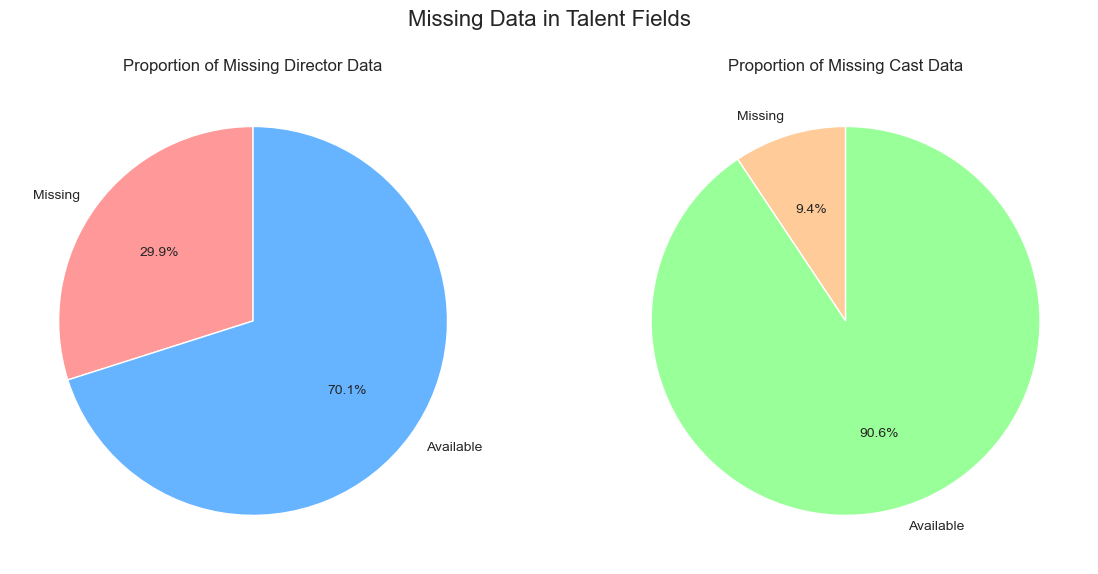

In [17]:
# --- Q14: How many titles have unknown directors or cast members? ---
print("\n--- Q14: Titles with Unknown Directors or Cast ---")

missing_directors_count = df['director'].isna().sum()
total_titles = len(df)
percent_missing_directors = (missing_directors_count / total_titles) * 100

print(f"Total titles: {total_titles}")
print(f"Titles with missing 'director' data: {missing_directors_count}")
print(f"Percentage of titles with missing 'director': {percent_missing_directors:.2f}%")

missing_cast_count = df['cast'].isna().sum()
percent_missing_cast = (missing_cast_count / total_titles) * 100

print(f"\nTitles with missing 'cast' data: {missing_cast_count}")
print(f"Percentage of titles with missing 'cast': {percent_missing_cast:.2f}%")

# Pie chart for Director
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie([missing_directors_count, total_titles - missing_directors_count], 
        labels=['Missing', 'Available'], autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Missing Director Data')

# Pie chart for Cast
plt.subplot(1, 2, 2)
plt.pie([missing_cast_count, total_titles - missing_cast_count], 
        labels=['Missing', 'Available'], autopct='%1.1f%%', 
        startangle=90, colors=['#ffcc99','#99ff99'])
plt.title('Proportion of Missing Cast Data')

plt.suptitle('Missing Data in Talent Fields', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('q14_missing_talent_data.png')
print("\nGenerated 'q14_missing_talent_data.png'")


--- Q15: Movie Duration Analysis ---
Average movie duration: 99.58 minutes

Generated 'q15_movie_duration_distribution.png'


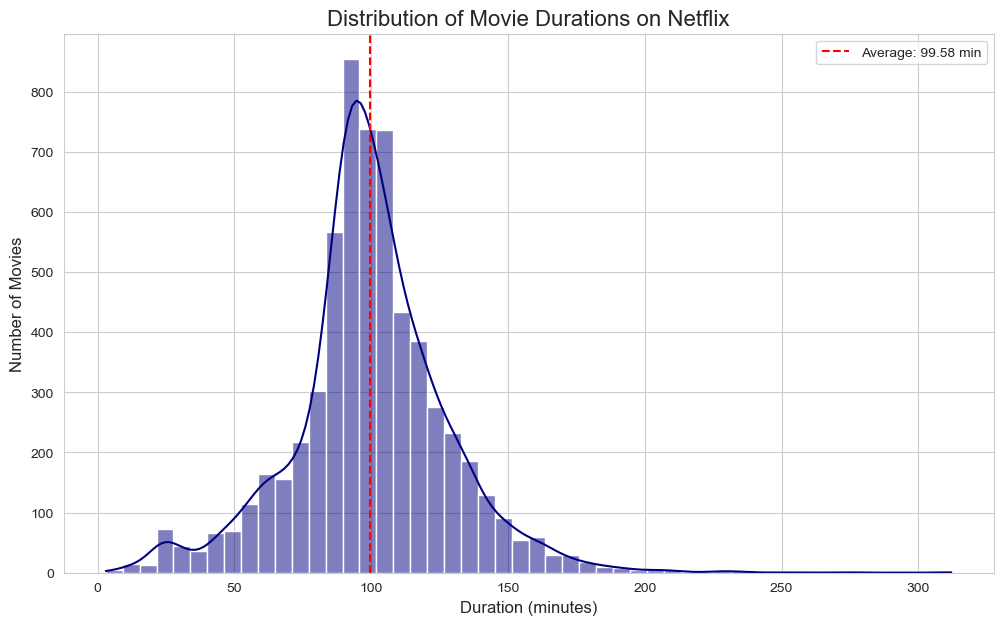

In [18]:
# --- Q15: Movie Duration Analysis ---
print("\n--- Q15: Movie Duration Analysis ---")
df_movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)

average_duration = df_movies['duration_min'].mean()
print(f"Average movie duration: {average_duration:.2f} minutes")

# Plot the distribution of movie durations
plt.figure(figsize=(12, 7))
sns.histplot(df_movies['duration_min'], bins=50, kde=True, color='navy')
plt.title('Distribution of Movie Durations on Netflix', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.axvline(average_duration, color='red', linestyle='--', 
            label=f'Average: {average_duration:.2f} min')
plt.legend()
plt.savefig('q15_movie_duration_distribution.png')
print("\nGenerated 'q15_movie_duration_distribution.png'")


--- Q16: TV Show Season Analysis ---
Frequency of TV Show Season Counts:
duration
1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
12 Seasons       2
15 Seasons       2
11 Seasons       2
17 Seasons       1
Name: count, dtype: int64

The most common number of seasons is: 1 Season

Generated 'q16_tv_show_seasons.png'


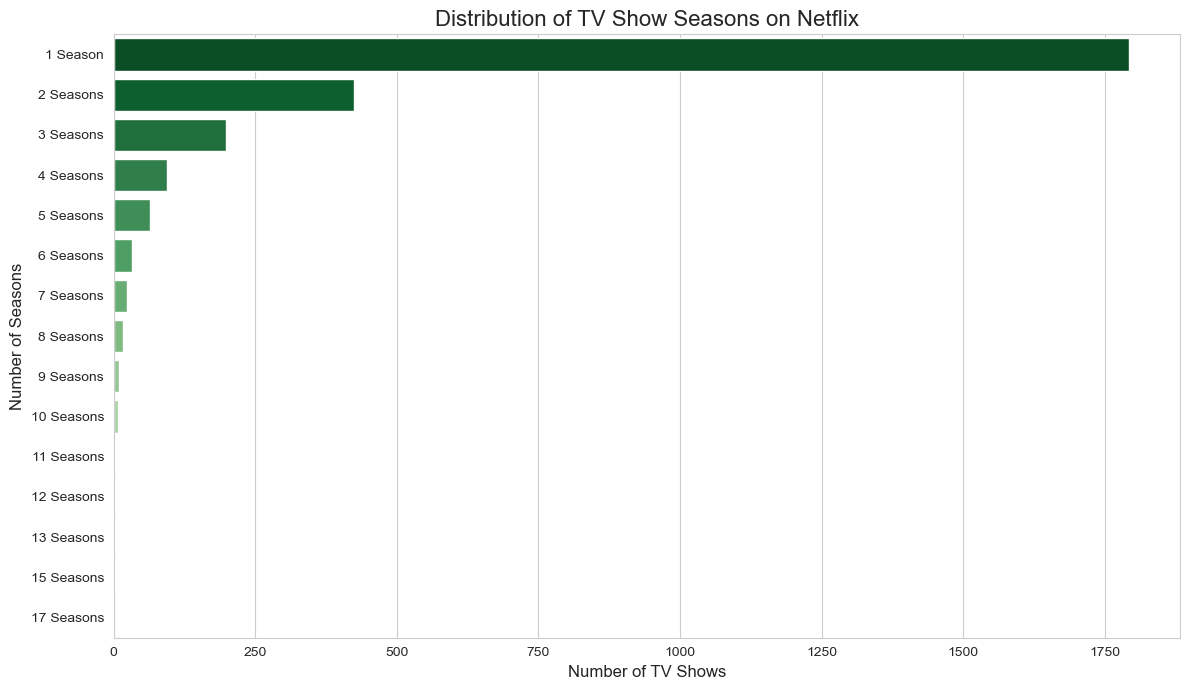

In [19]:
# --- Q16: TV Show Season Analysis ---
print("\n--- Q16: TV Show Season Analysis ---")
df_tv = df[df['type'] == 'TV Show'].dropna(subset=['duration']).copy()

season_counts = df_tv['duration'].value_counts()
most_common_seasons = season_counts.index[0]

print("Frequency of TV Show Season Counts:")
print(season_counts)
print(f"\nThe most common number of seasons is: {most_common_seasons}")

# Plot the distribution of seasons
plt.figure(figsize=(12, 7))
# Sort the index by the numeric value of seasons
order = season_counts.index.sort_values(key=lambda x: x.str.split(' ').str[0].astype(int))
sns.barplot(y=season_counts.index, x=season_counts.values, palette='Greens_r', order=order)
plt.title('Distribution of TV Show Seasons on Netflix', fontsize=16)
plt.xlabel('Number of TV Shows', fontsize=12)
plt.ylabel('Number of Seasons', fontsize=12)
plt.tight_layout()
plt.savefig('q16_tv_show_seasons.png')
print("\nGenerated 'q16_tv_show_seasons.png'")


--- Q17: Trend in Movie Durations Over Time ---
Average Movie Duration by Release Year (2012-2021):
    release_year  duration_min
22          2012    100.757225
23          2013     98.048889
24          2014    100.261364
25          2015     99.513854
26          2016     95.360182
27          2017     95.535248
28          2018     96.185137
29          2019     93.466035
30          2020     92.141199
31          2021     96.444043

Generated 'q17_movie_duration_trend.png'


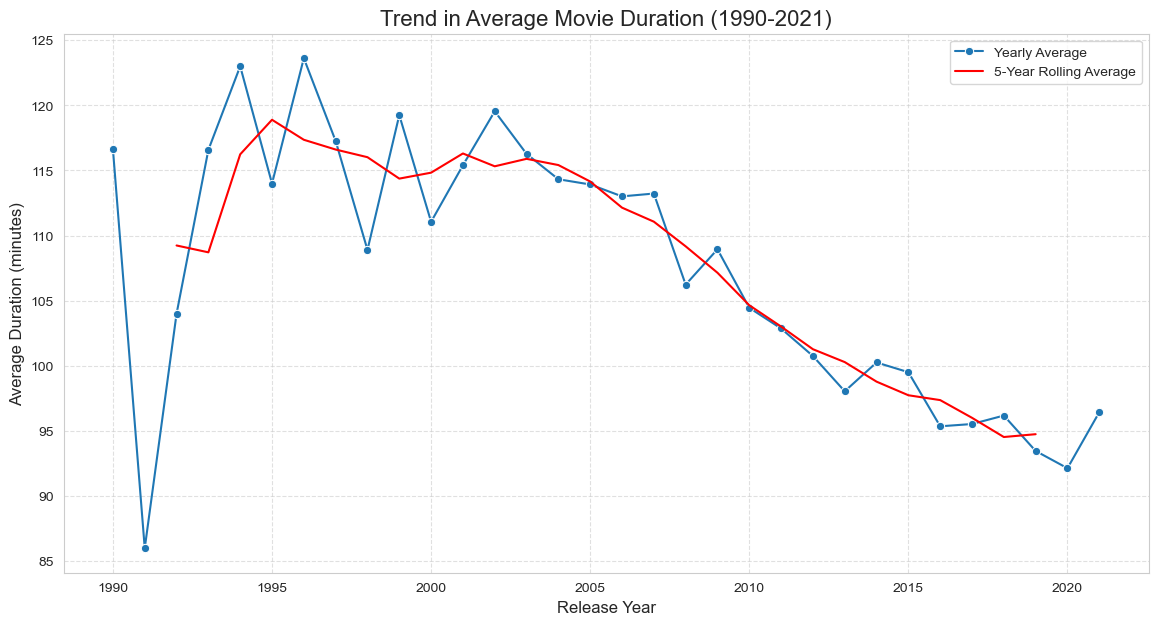

In [20]:
# --- Q17: Trend in Movie Durations Over Time ---
print("\n--- Q17: Trend in Movie Durations Over Time ---")
# df_movies was created in Q15, but we recreate it here for standalone clarity
df_movies = df[df['type'] == 'Movie'].dropna(subset=['duration']).copy()
df_movies['duration_min'] = df_movies['duration'].str.replace(' min', '').astype(int)

# Group by 'release_year' and calculate the mean duration
# Filter for 1990 onwards for a clearer, more relevant trend
movies_recent = df_movies[df_movies['release_year'] >= 1990]
duration_trend = movies_recent.groupby('release_year')['duration_min'].mean().reset_index()

print("Average Movie Duration by Release Year (2012-2021):")
print(duration_trend.tail(10)) # Print last 10 years

plt.figure(figsize=(14, 7))
sns.lineplot(x='release_year', y='duration_min', data=duration_trend, marker='o', label='Yearly Average')
# Add a rolling average to smooth out the noise
duration_trend['rolling_avg_5yr'] = duration_trend['duration_min'].rolling(window=5, center=True).mean()
sns.lineplot(x='release_year', y='rolling_avg_5yr', data=duration_trend, color='red', 
             label='5-Year Rolling Average')

plt.title('Trend in Average Movie Duration (1990-2021)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Duration (minutes)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('q17_movie_duration_trend.png')
print("\nGenerated 'q17_movie_duration_trend.png'")


--- Q18: Content Addition by Month ---
Content Added by Month:
month_added_name
January      738
February     563
March        742
April        764
May          632
June         728
July         827
August       755
September    770
October      760
November     705
December     813
Name: count, dtype: int64

Generated 'q18_month_added.png'


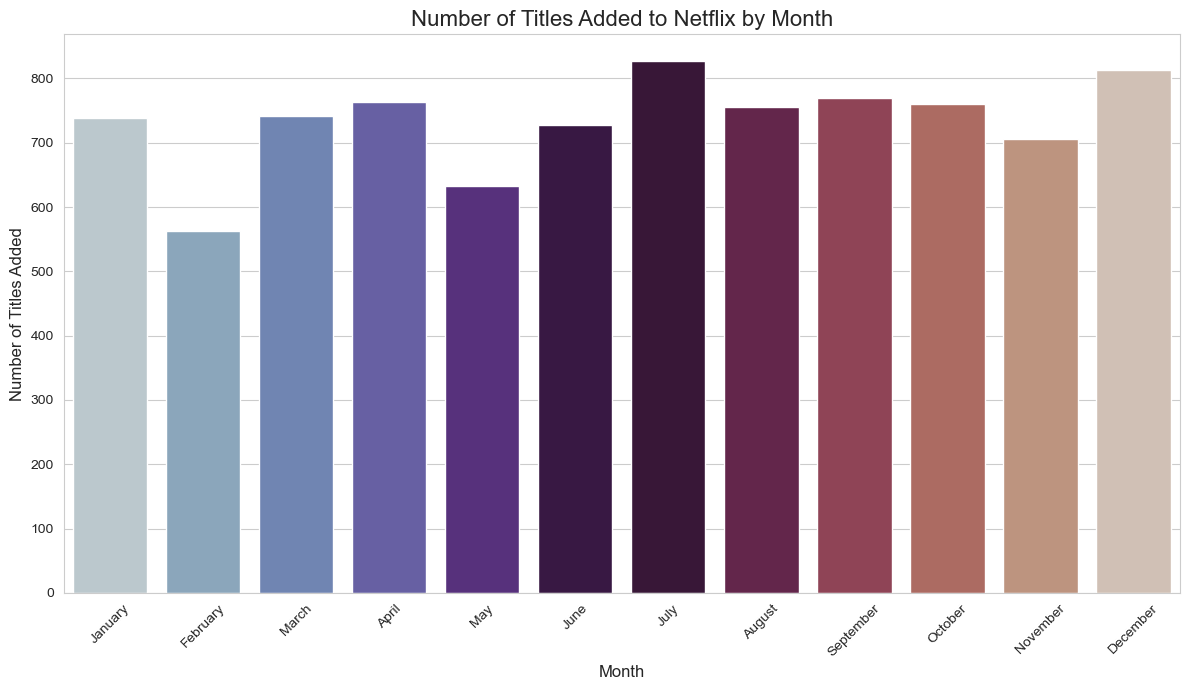

In [21]:
# --- Q18: Content Addition by Month ---
print("\n--- Q18: Content Addition by Month ---")
df_dates = df.dropna(subset=['date_added']).copy()
df_dates['date_added'] = pd.to_datetime(df_dates['date_added'].str.strip(), format='%B %d, %Y')

# Extract month name and number
df_dates['month_added_name'] = df_dates['date_added'].dt.strftime('%B')
df_dates['month_added_num'] = df_dates['date_added'].dt.month

# Get counts and sort by month number
month_counts = df_dates.groupby('month_added_name')['month_added_num'].agg(count='count', month_num='mean').sort_values('month_num')

print("Content Added by Month:")
print(month_counts['count'])

plt.figure(figsize=(12, 7))
sns.barplot(x=month_counts.index, y=month_counts['count'], palette='twilight')
plt.title('Number of Titles Added to Netflix by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('q18_month_added.png')
print("\nGenerated 'q18_month_added.png'")


--- Q19: Genre Distribution Over Time ---
Count of Top 5 Genres by Release Year (2010-2021):
genre         Comedies  Documentaries  Dramas  International Movies  \
release_year                                                          
2010                52              8      66                    75   
2011                51              7      60                    55   
2012                61             11      66                    80   
2013                65             30      83                   121   
2014                79             31     104                   127   
2015                94             67     180                   210   
2016               150            137     265                   305   
2017               164            172     285                   328   
2018               178            120     304                   340   
2019               159            104     243                   282   
2020               133             77     195         

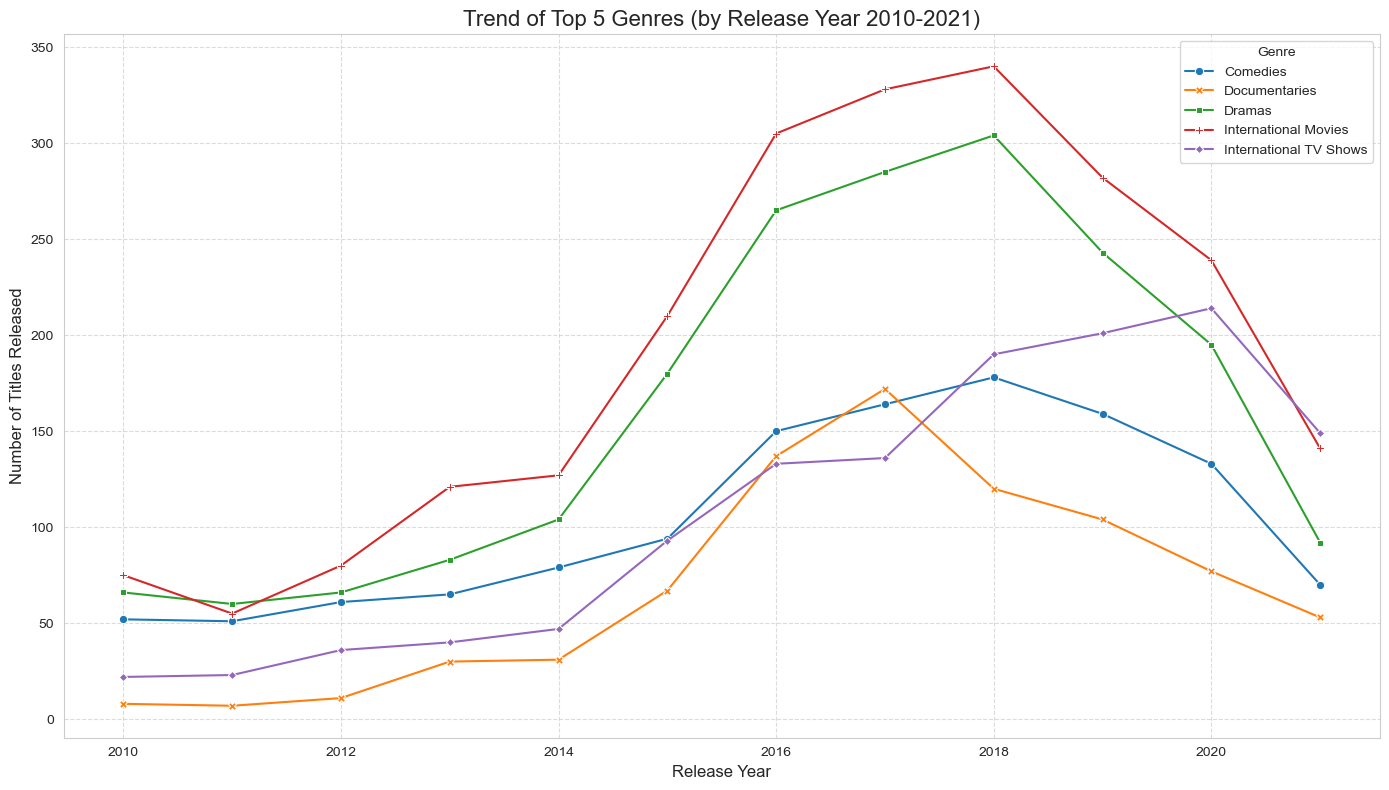

In [22]:
# --- Q19: Genre Distribution Over Time ---
print("\n--- Q19: Genre Distribution Over Time ---")
# Focus on the top 5 genres for clarity
top_5_genres = ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries']

df_genre_trend = df.dropna(subset=['listed_in']).copy()
df_genre_trend = df_genre_trend[df_genre_trend['release_year'] >= 2010]

# Explode genres
df_genre_trend['genre'] = df_genre_trend['listed_in'].str.split(', ')
df_genre_trend = df_genre_trend.explode('genre')
df_genre_trend['genre'] = df_genre_trend['genre'].str.strip()

df_top_genres = df_genre_trend[df_genre_trend['genre'].isin(top_5_genres)]

# Create a pivot table: year vs. genre
genre_trend_pivot = df_top_genres.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

print("Count of Top 5 Genres by Release Year (2010-2021):")
print(genre_trend_pivot)

# Plot as a line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_trend_pivot, markers=True, dashes=False)
plt.title('Trend of Top 5 Genres (by Release Year 2010-2021)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles Released', fontsize=12)
plt.legend(title='Genre')
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('q19_genre_trends_over_time.png')
print("\nGenerated 'q19_genre_trends_over_time.png'")


--- Q20: Top Producing Countries by Genre ---
Top 10 producing countries for each of the top 5 genres:

--- Top Producers for: International Movies ---
country_single
India             845
United Kingdom    123
France            117
Spain             115
Egypt              95
Nigeria            82
Indonesia          79
Turkey             78
Philippines        76
Hong Kong          67
Name: count, dtype: int64
------------------------------
--- Top Producers for: Dramas ---
country_single
United States     674
India             645
United Kingdom    133
France             72
Indonesia          62
Nigeria            58
Spain              55
Philippines        48
Canada             46
Egypt              41
Name: count, dtype: int64
------------------------------
--- Top Producers for: Comedies ---
country_single
United States     610
India             315
United Kingdom     60
Turkey             58
Egypt              57
Canada             54
Spain              40
Nigeria            39
Fr

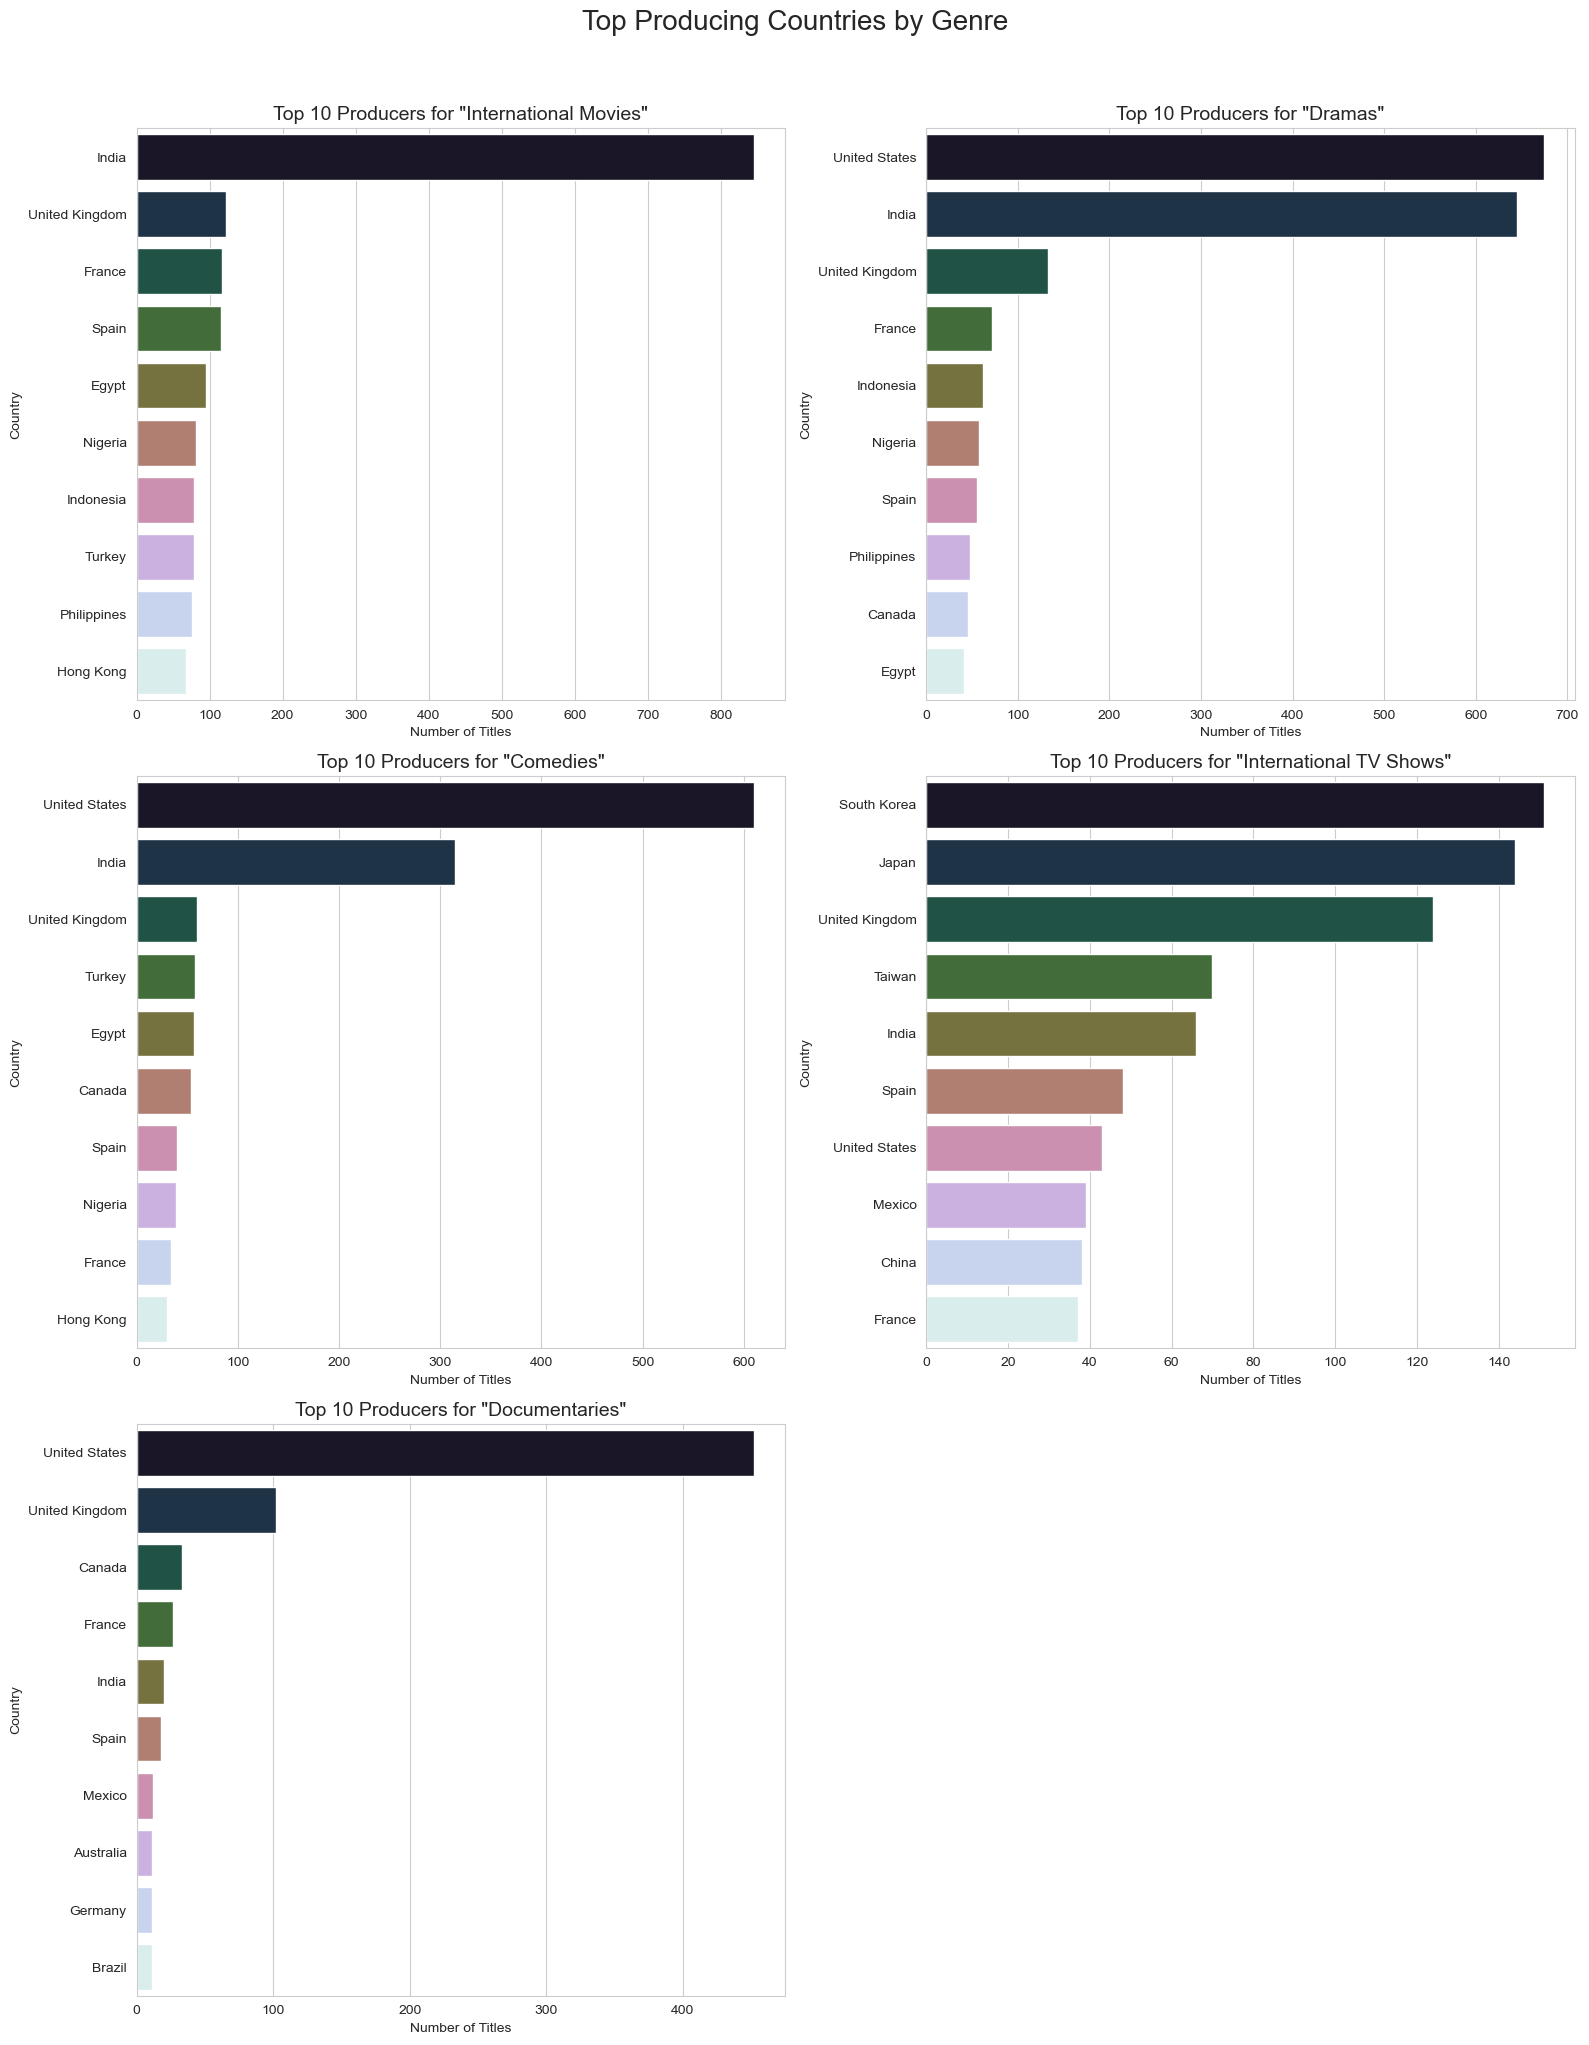

In [23]:
# --- Q20: Top Producing Countries by Genre ---
print("\n--- Q20: Top Producing Countries by Genre ---")
top_5_genres = ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries']

df_country_genre = df.dropna(subset=['country', 'listed_in']).copy()

# Use primary country
df_country_genre['country_single'] = df_country_genre['country'].str.split(', ').str[0]
df_country_genre['genre_single'] = df_country_genre['listed_in'].str.split(', ')
df_country_genre = df_country_genre.explode('genre_single')

df_country_genre['country_single'] = df_country_genre['country_single'].str.strip()
df_country_genre['genre_single'] = df_country_genre['genre_single'].str.strip()

df_top_5_c_g = df_country_genre[df_country_genre['genre_single'].isin(top_5_genres)]

print("Top 10 producing countries for each of the top 5 genres:\n")

# Create a subplot for each genre
fig, axes = plt.subplots(3, 2, figsize=(16, 20))
axes = axes.flatten() # Flatten the grid

for i, genre in enumerate(top_5_genres):
    genre_country_counts = df_top_5_c_g[df_top_5_c_g['genre_single'] == genre]['country_single'].value_counts()
    top_10 = genre_country_counts.head(10)
    
    print(f"--- Top Producers for: {genre} ---")
    print(top_10)
    print("-" * 30)
    
    sns.barplot(ax=axes[i], y=top_10.index, x=top_10.values, palette='cubehelix')
    axes[i].set_title(f'Top 10 Producers for "{genre}"', fontsize=14)
    axes[i].set_xlabel('Number of Titles', fontsize=10)
    axes[i].set_ylabel('Country', fontsize=10)

axes[-1].axis('off') # Hide the 6th empty subplot
plt.suptitle('Top Producing Countries by Genre', fontsize=20, y=1.02)
plt.tight_layout()
plt.savefig('q20_top_countries_by_genre.png')
print("\nGenerated 'q20_top_countries_by_genre.png'")